In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('survey_results_public.csv')
null_counts = df.isna().sum()
columns_to_drop = null_counts[null_counts > 5000].index
df = df.drop(columns=columns_to_drop)

# Ergebnis ausgeben
print(df_cleaned.columns)

Index(['Respondent', 'University', 'EmploymentStatus', 'DeveloperType',
       'WebDeveloperType', 'NonDeveloperType', 'JobSatisfaction',
       'ExCoderReturn', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving',
       'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity',
       'AnnoyingUI', 'AssessJobDept', 'AssessJobTech', 'AssessJobProduct',
       'AssessJobFinances', 'ImportantBenefits', 'ClickyKeys', 'JobProfile',
       'ResumePrompted', 'LearnedHiring', 'ImportantHiringAlgorithms',
       'ImportantHiringTechExp', 'ImportantHiringCommunication',
       'ImportantHiringTitles', 'ImportantHiringEducation',
       'ImportantHiringRep', 'ImportantHiringGettingThingsDone', 'Currency',
       'Overpaid', 'TabsSpaces', 'EducationImportant', 'EducationTypes',
       'SelfTaughtTypes', 'TimeAfterBootcamp', 'CousinEducation', 'WorkStart'],
      dtype='object')


/tmp/ipykernel_3574/593314694.py:5: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('survey_results_public.csv')


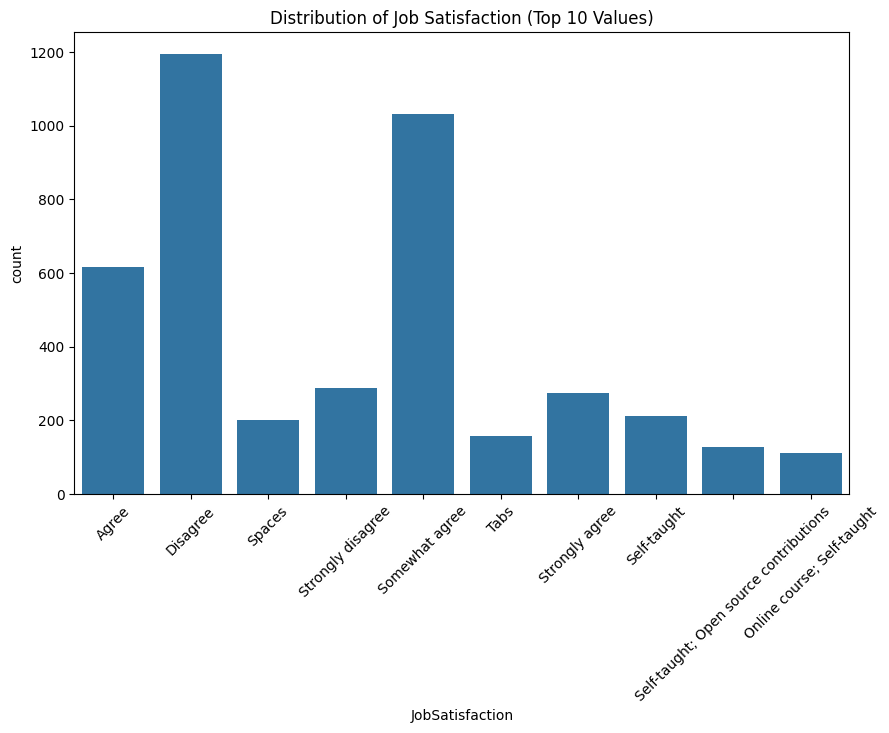

In [34]:
top_job_satisfaction = df['JobSatisfaction'].value_counts().nlargest(10).index
df_job_satisfaction = df[df['JobSatisfaction'].isin(top_job_satisfaction)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_job_satisfaction, x='JobSatisfaction')
plt.title('Distribution of Job Satisfaction (Top 10 Values)')
plt.xticks(rotation=45)
plt.show()

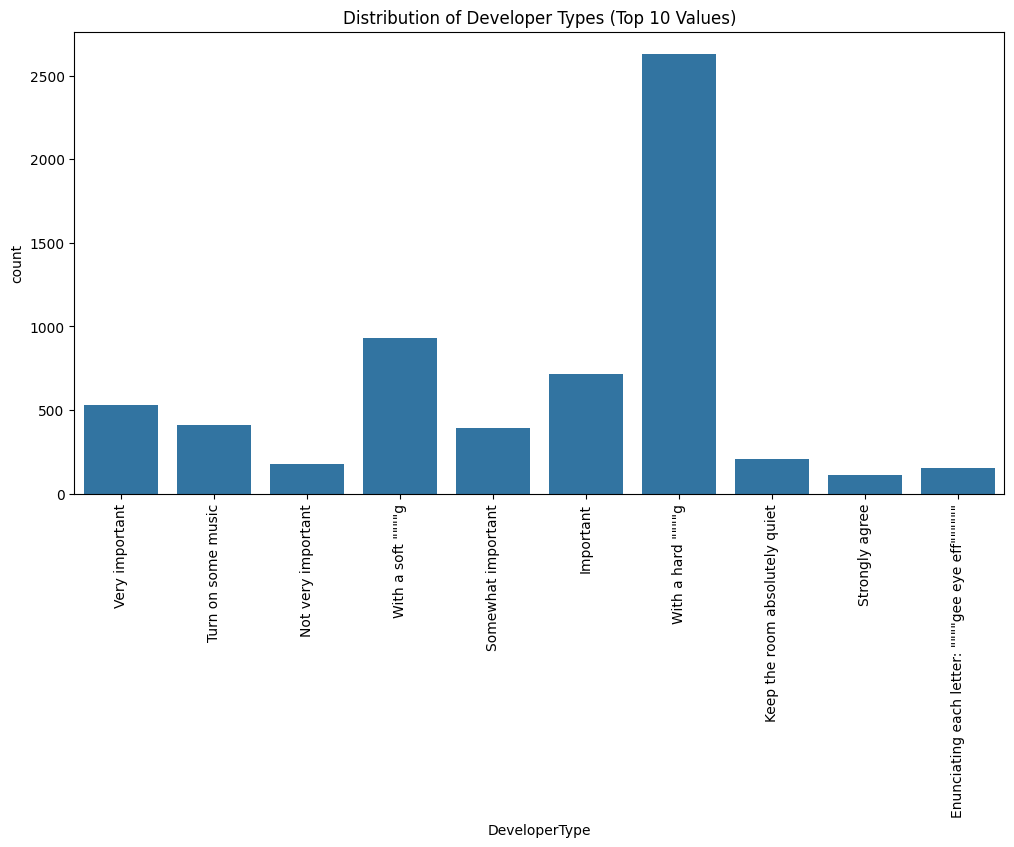

In [35]:
top_developer_type = df['DeveloperType'].value_counts().nlargest(10).index
df_developer_type = df[df['DeveloperType'].isin(top_developer_type)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_developer_type, x='DeveloperType')
plt.title('Distribution of Developer Types (Top 10 Values)')
plt.xticks(rotation=90)
plt.show()

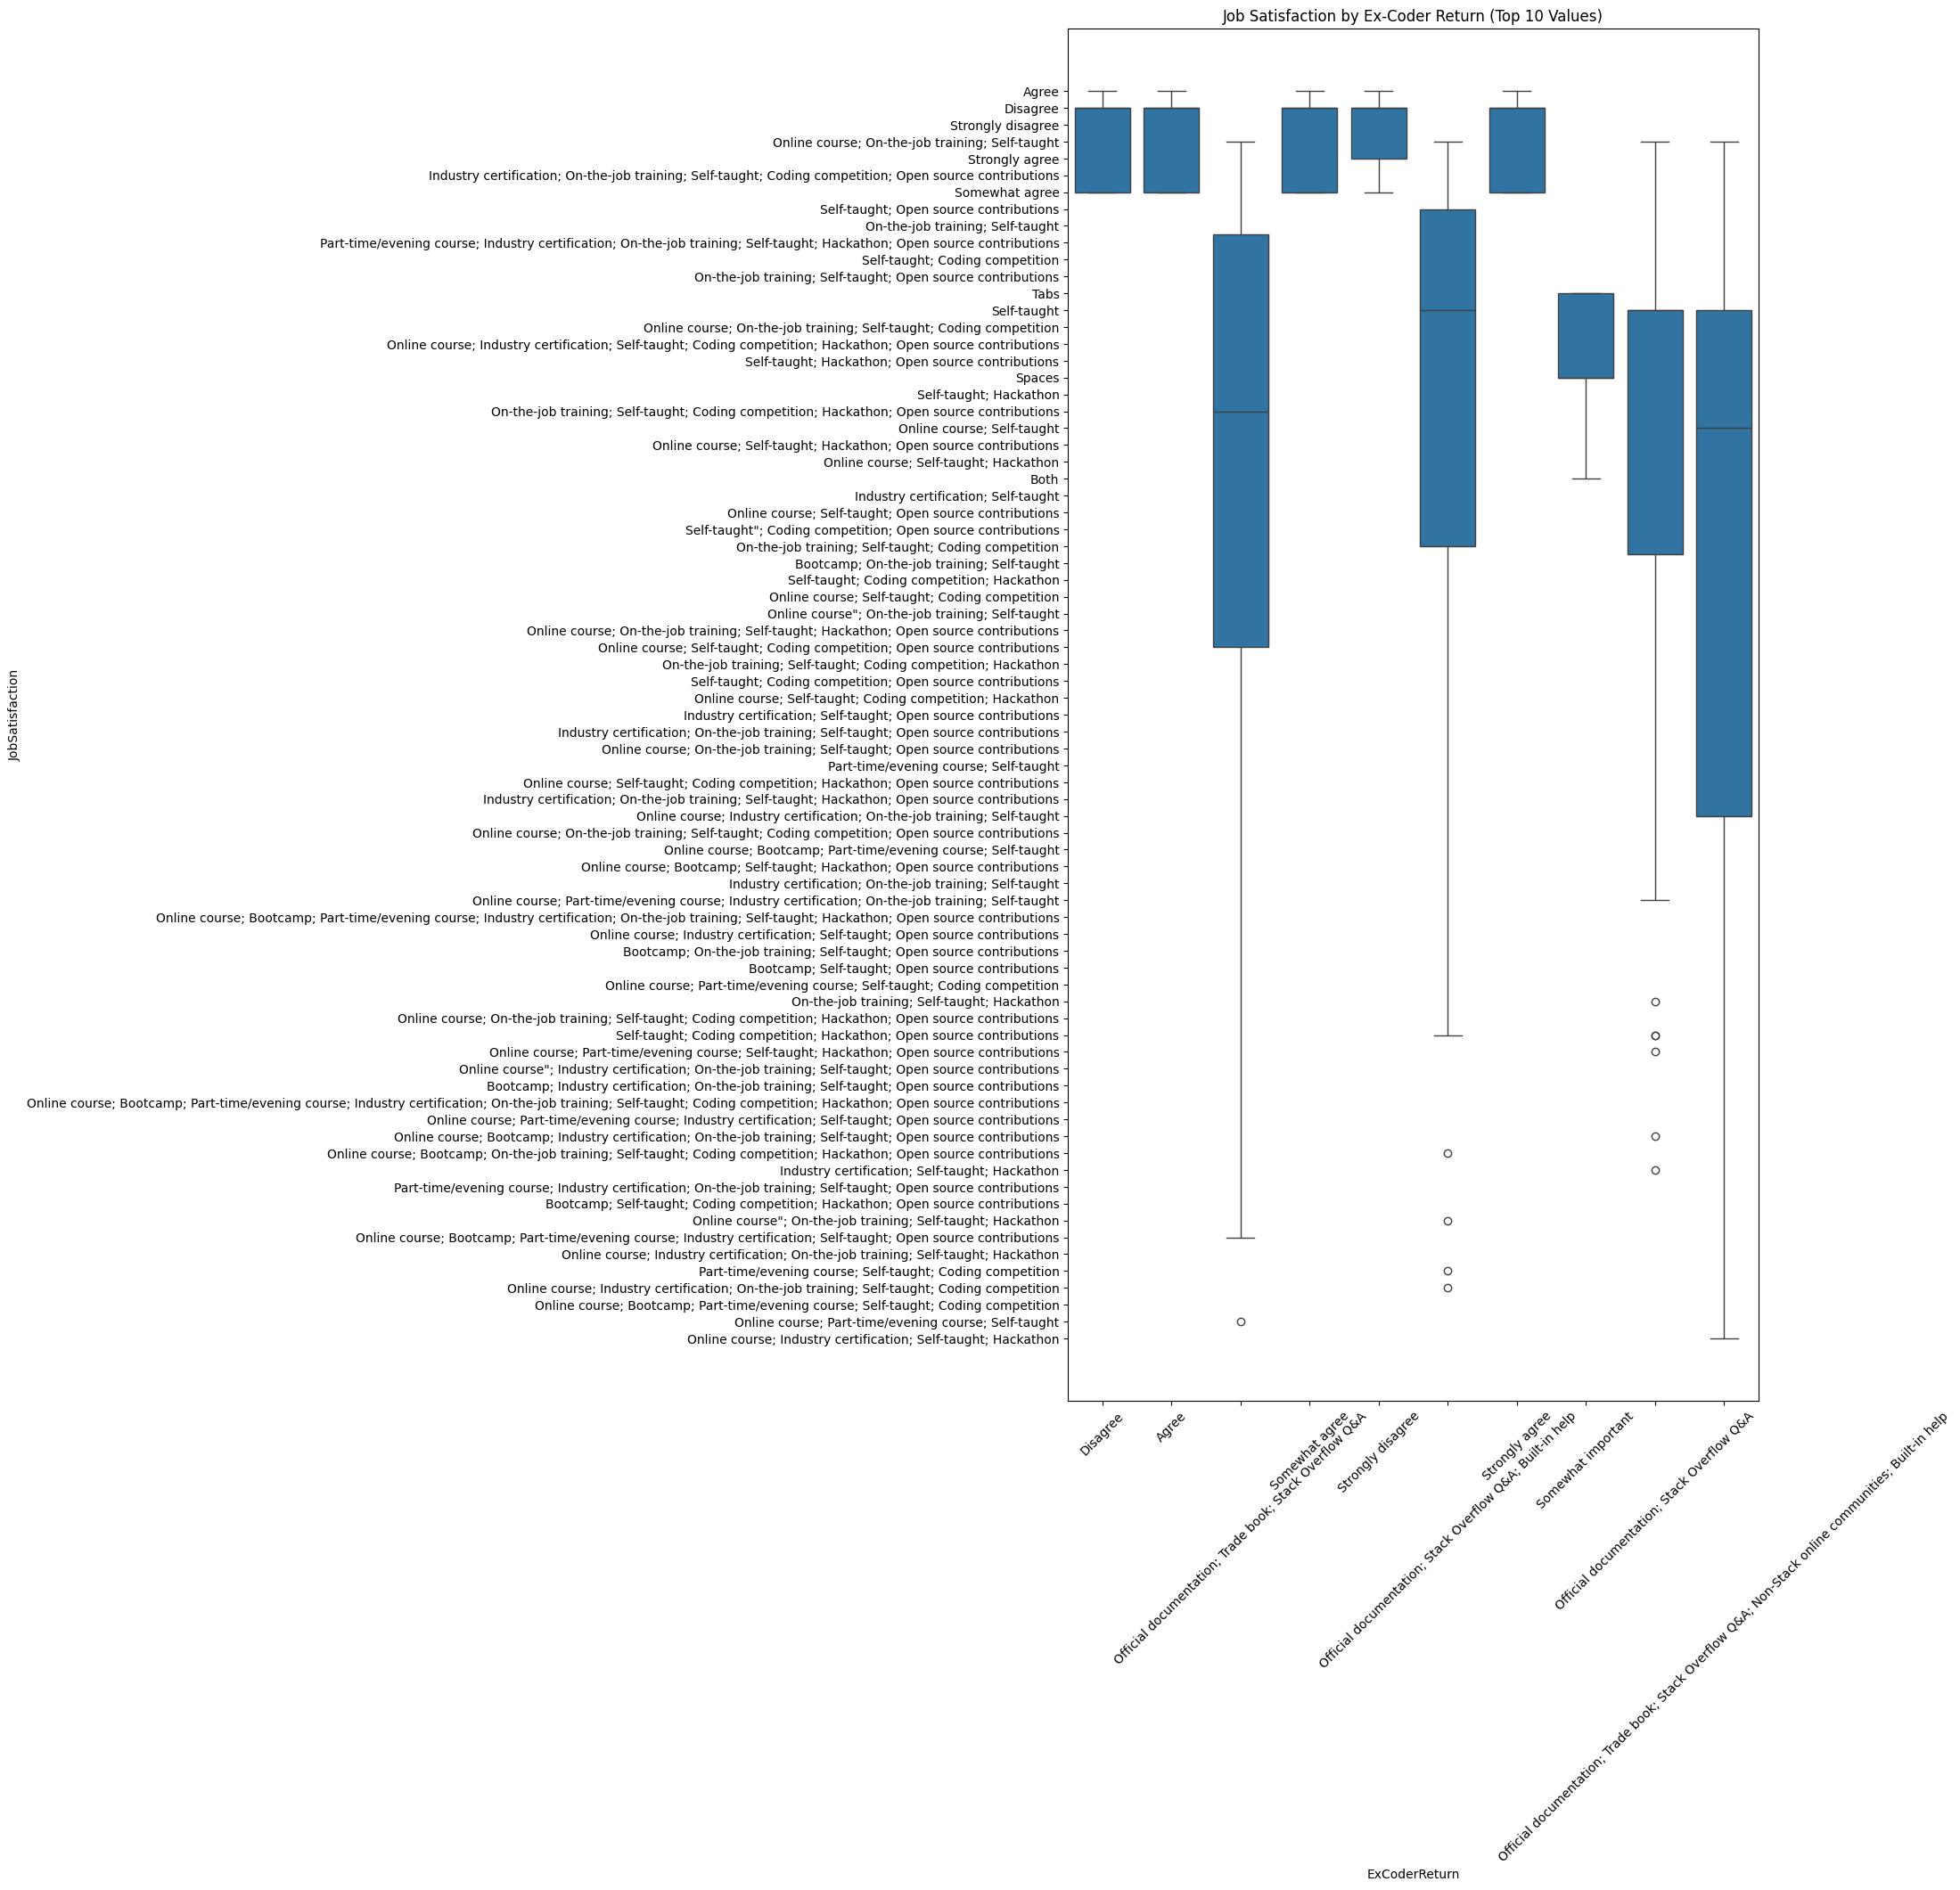

In [37]:
top_ex_coder_return = df['ExCoderReturn'].value_counts().nlargest(10).index
df_ex_coder_return = df[df['ExCoderReturn'].isin(top_ex_coder_return)]

plt.figure(figsize=(10, 20))
sns.boxplot(data=df_ex_coder_return, x='ExCoderReturn', y='JobSatisfaction')
plt.title('Job Satisfaction by Ex-Coder Return (Top 10 Values)')
plt.xticks(rotation=45)
plt.show()

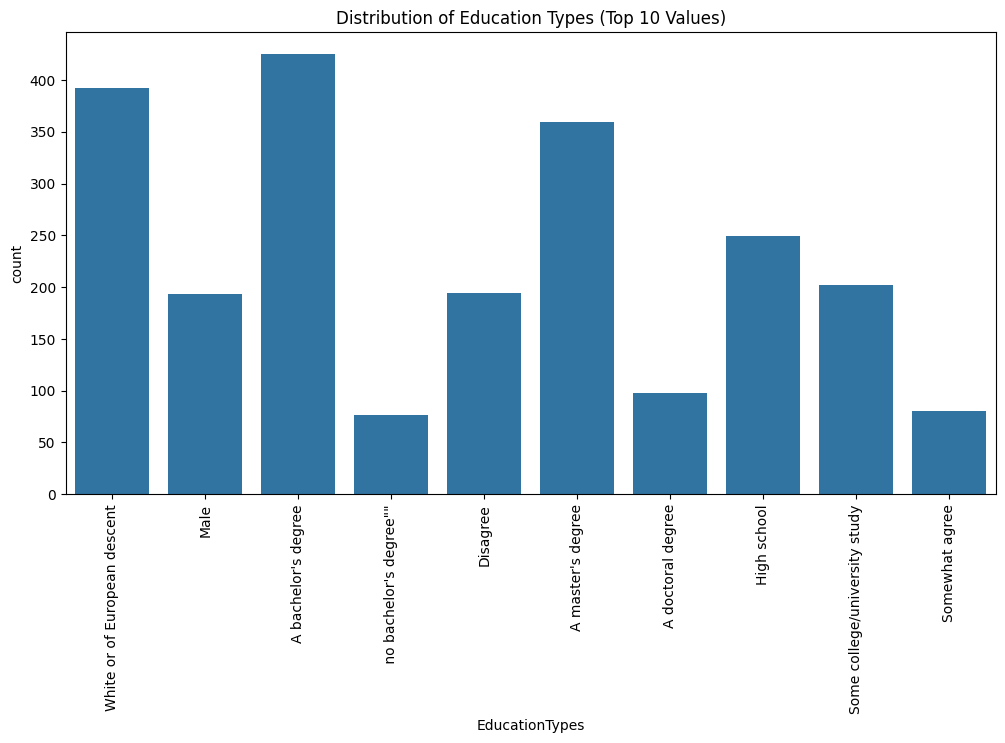

In [38]:
top_education_types = df['EducationTypes'].value_counts().nlargest(10).index
df_education_types = df[df['EducationTypes'].isin(top_education_types)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_education_types, x='EducationTypes')
plt.title('Distribution of Education Types (Top 10 Values)')
plt.xticks(rotation=90)
plt.show()

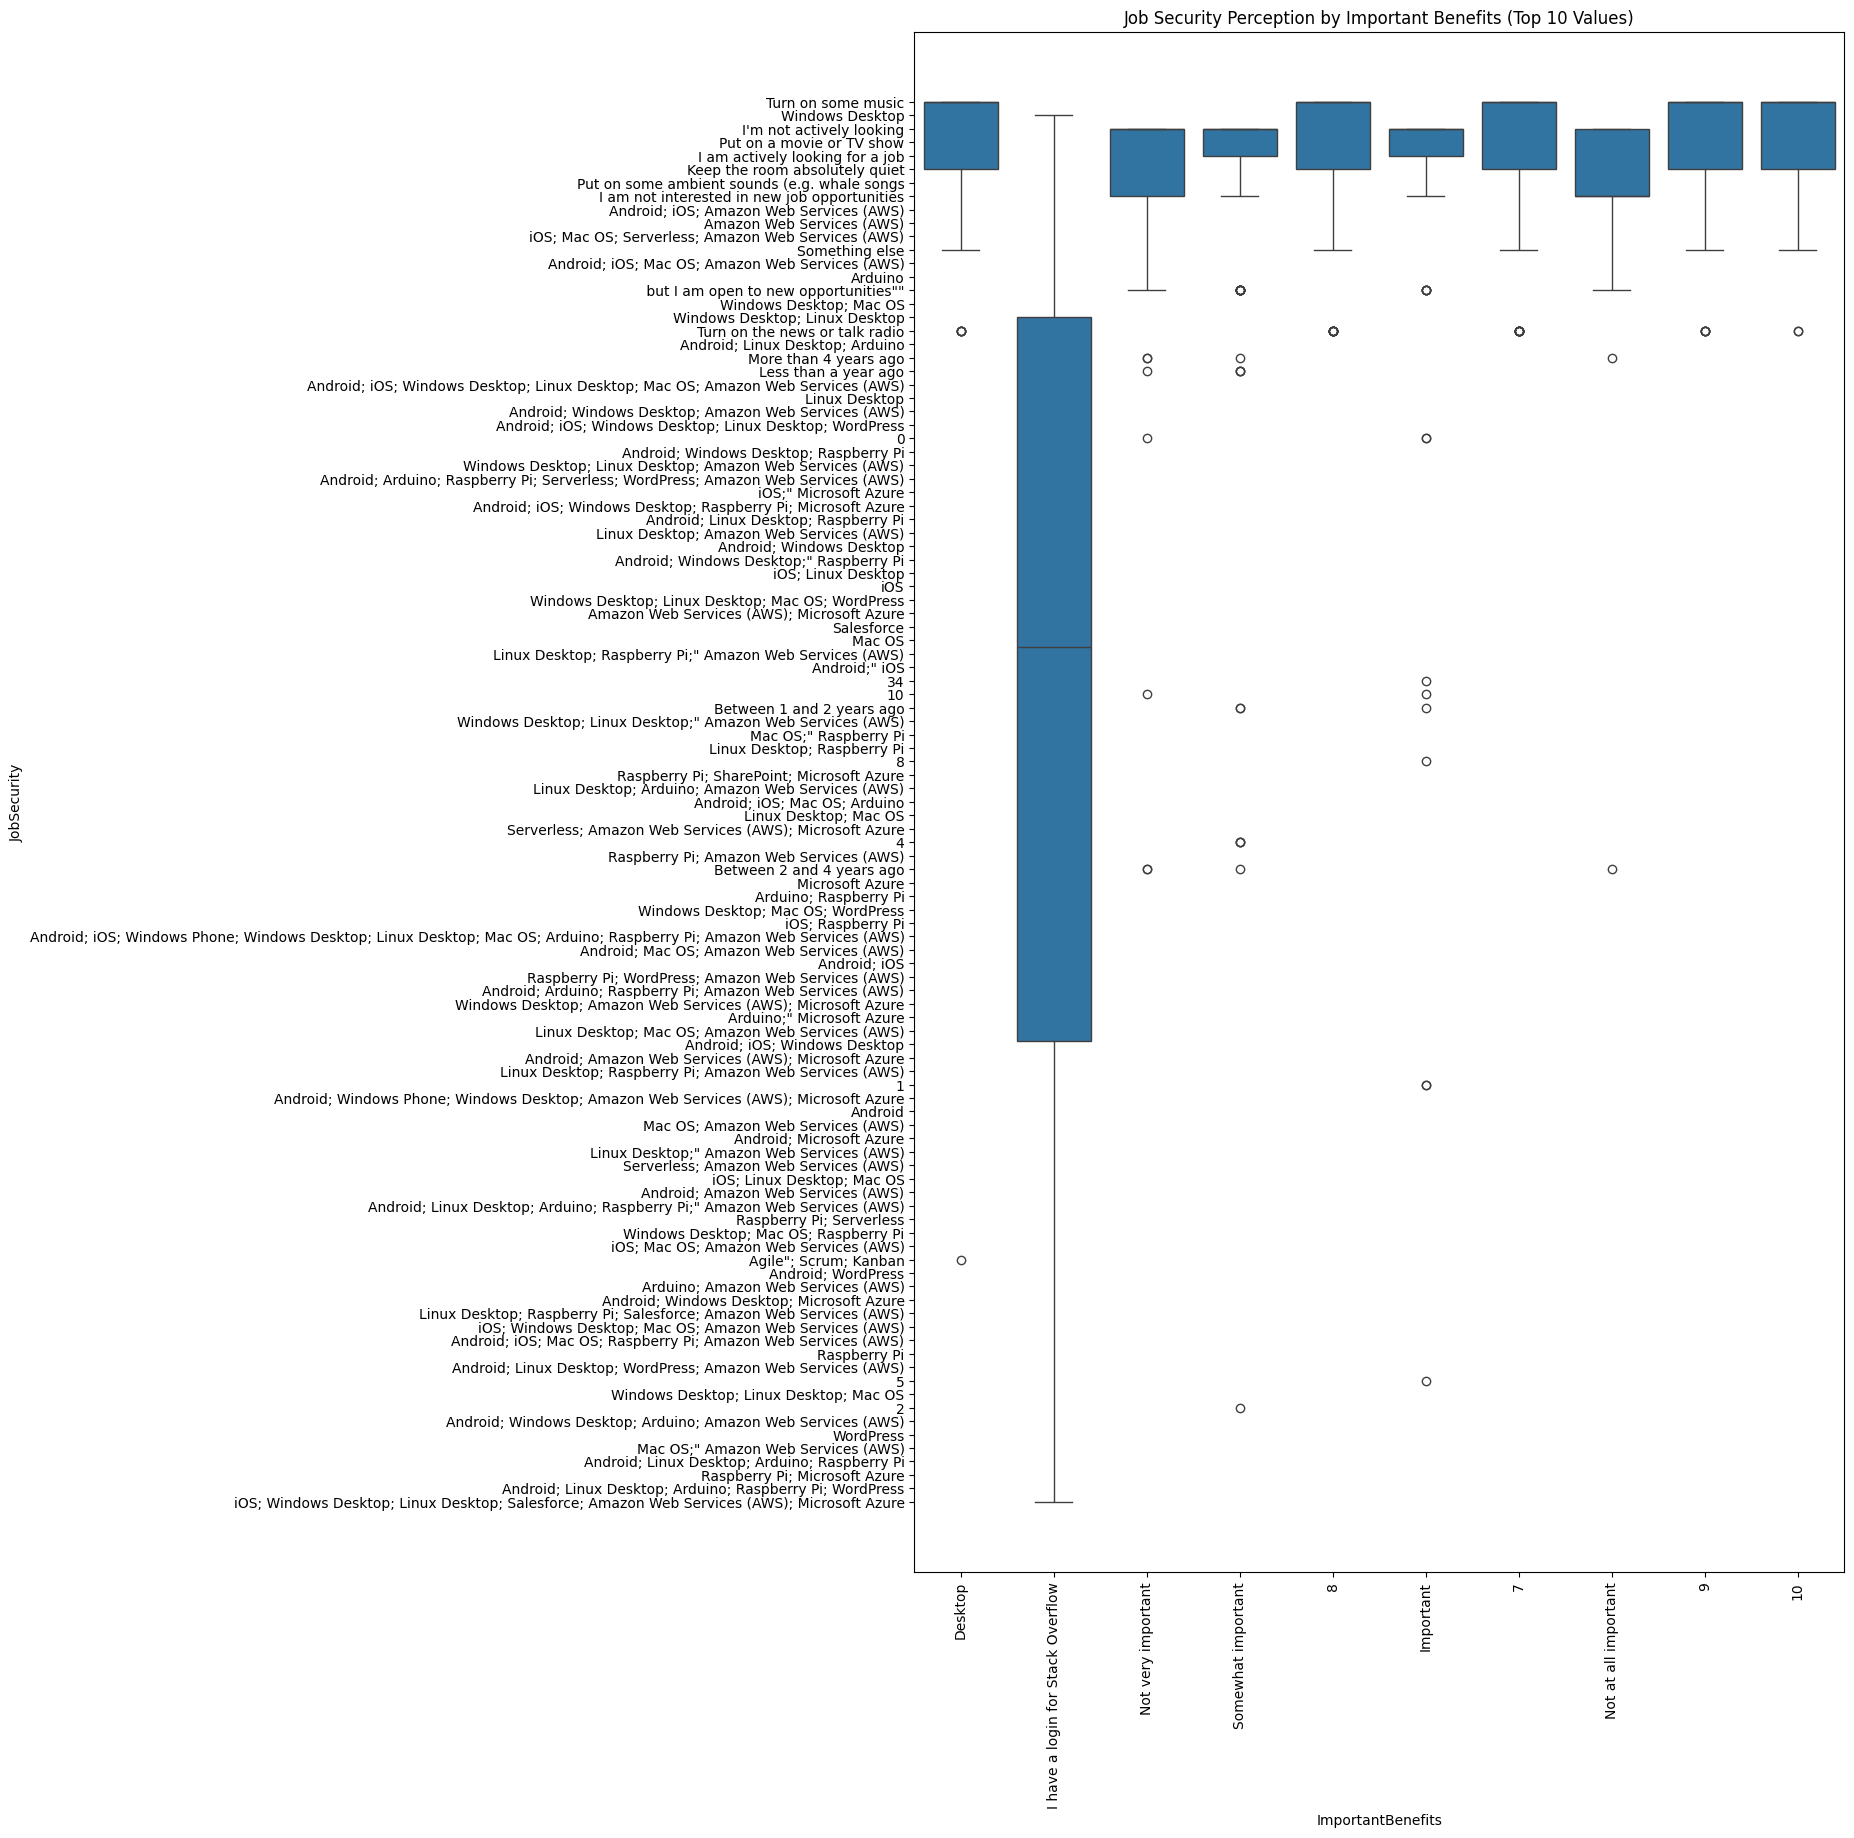

In [40]:
top_important_benefits = df['ImportantBenefits'].value_counts().nlargest(10).index
df_important_benefits = df[df['ImportantBenefits'].isin(top_important_benefits)]

plt.figure(figsize=(12, 20))
sns.boxplot(data=df_important_benefits, x='ImportantBenefits', y='JobSecurity')
plt.title('Job Security Perception by Important Benefits (Top 10 Values)')
plt.xticks(rotation=90)
plt.show()